In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

Job Title  \
0                     Data Scientist / Data Engineer   
1                                     Data Scientist   
2  W 3 - Professur Allgemeine Betriebswirtschafts...   
3  Senior Data Scientist / Software Entwickler fü...   
4                   DATA SCIENTIST (m/w/d) in Munich   

                                     Job Description  Rating  \
0  Information on the current situation COVID-19:...     4.2   
1  Data Scientist\n\n\nThe Oerlikon Digital Hub i...     3.2   
2  Die ESB Business School der Hochschule Reutlin...     3.7   
3  Qualität, Effizienz und Innovationskraft sind ...     3.9   
4  What to expect*\nWe are looking for an experie...    -1.0   

                       Company Name     Location  Headquarters  \
0                Bettzeit GmbH\n4.2    Frankfurt            -1   
1   OC Oerlikon Corporation AG\n3.2  Feldkirchen            -1   
2        Reutlingen University\n3.7   Reutlingen            -1   
3  MTU Aero Engines Holding AG\n3.9     Hannover            -1   
4                           Snke OS  Deutschland            -1   

                   Size  Founded     Type of ownership       Industry  ...  \
0  201 to 500 Employees     2013     Company - Private  Manufacturing  ...   
1      10000+ Employees     1907      Company - Public  Manufacturing  ...   
2  201 to 500 Employees       -1  College / University      Education  ...   
3      10000+ Employees     1934      Company - Public  Manufacturing  ...   
4                    -1       -1                    -1             -1  ...   

                     company_txt  age python  R  spark  aws  excel  SAP  SQL  \
0                Bettzeit GmbH\n    7      1  0      0    0      1    0    0   
1   OC Oerlikon Corporation AG\n  113      1  0      1    0      1    0    1   
2        Reutlingen University\n   -1      0  0      0    0      0    0    0   
3  MTU Aero Engines Holding AG\n   86      0  0      0    0      0    0    0   
4                        Snke OS   -1      1  0      0    0      0    0    0   

   ML  
0   1  
1   1  
2   0  
3   0  
4   1  

[5 rows x 22 columns]

In [4]:
df_drop = df.drop('Headquarters',axis=1)

In [5]:
df_drop.head()

Job Title  \
0                     Data Scientist / Data Engineer   
1                                     Data Scientist   
2  W 3 - Professur Allgemeine Betriebswirtschafts...   
3  Senior Data Scientist / Software Entwickler fü...   
4                   DATA SCIENTIST (m/w/d) in Munich   

                                     Job Description  Rating  \
0  Information on the current situation COVID-19:...     4.2   
1  Data Scientist\n\n\nThe Oerlikon Digital Hub i...     3.2   
2  Die ESB Business School der Hochschule Reutlin...     3.7   
3  Qualität, Effizienz und Innovationskraft sind ...     3.9   
4  What to expect*\nWe are looking for an experie...    -1.0   

                       Company Name     Location                  Size  \
0                Bettzeit GmbH\n4.2    Frankfurt  201 to 500 Employees   
1   OC Oerlikon Corporation AG\n3.2  Feldkirchen      10000+ Employees   
2        Reutlingen University\n3.7   Reutlingen  201 to 500 Employees   
3  MTU Aero Engines Holding AG\n3.9     Hannover      10000+ Employees   
4                           Snke OS  Deutschland                    -1   

   Founded     Type of ownership       Industry  \
0     2013     Company - Private  Manufacturing   
1     1907      Company - Public  Manufacturing   
2       -1  College / University      Education   
3     1934      Company - Public  Manufacturing   
4       -1                    -1             -1   

                                  Sector  ...                    company_txt  \
0        Consumer Products Manufacturing  ...                Bettzeit GmbH\n   
1               Industrial Manufacturing  ...   OC Oerlikon Corporation AG\n   
2                Colleges & Universities  ...        Reutlingen University\n   
3  Electrical & Electronic Manufacturing  ...  MTU Aero Engines Holding AG\n   
4                                     -1  ...                        Snke OS   

   age  python  R  spark  aws  excel  SAP  SQL  ML  
0    7       1  0      0    0      1    0    0   1  
1  113       1  0      1    0      1    0    1   1  
2   -1       0  0      0    0      0    0    0   0  
3   86       0  0      0    0      0    0    0   0  
4   -1       1  0      0    0      0    0    0   1  

[5 rows x 21 columns]

In [6]:
df = df_drop

In [7]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'company_txt', 'age', 'python', 'R', 'spark', 'aws', 'excel', 'SAP',
       'SQL', 'ML'],
      dtype='object')

In [8]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title


In [9]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [10]:
df.job_simp.value_counts()

data scientist    401
na                133
data engineer     114
analyst           105
mle                37
manager            10
Name: job_simp, dtype: int64

In [11]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        618
senior    151
jr         31
Name: seniority, dtype: int64

In [12]:
# city counting  
#df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.Location.value_counts()


Berlin               215
München              105
Hamburg               40
Frankfurt             39
Deutschland           38
                    ... 
Wuppertal              1
Grafing b.München      1
Kiel                   1
Kleinmachnow           1
Göppingen              1
Name: Location, Length: 129, dtype: int64

In [13]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      3370
1      4120
2      4006
3      3721
4      2333
       ... 
795    2774
796    3440
797    3569
798    3376
799    3851
Name: desc_len, Length: 800, dtype: int64

In [14]:
#Competitor count
#df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [15]:
#hourly wage to annual 
#df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
#df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [16]:
#df[df.hourly ==1][['hourly','min_salary','max_salary']]

In [17]:
df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating']< 0 else x['Company Name'][:-3],axis=1)

In [18]:
from IPython.display import display
pd.set_option('display.max_columns', None)

In [19]:
df.head()

Job Title  \
0                     Data Scientist / Data Engineer   
1                                     Data Scientist   
2  W 3 - Professur Allgemeine Betriebswirtschafts...   
3  Senior Data Scientist / Software Entwickler fü...   
4                   DATA SCIENTIST (m/w/d) in Munich   

                                     Job Description  Rating  \
0  Information on the current situation COVID-19:...     4.2   
1  Data Scientist\n\n\nThe Oerlikon Digital Hub i...     3.2   
2  Die ESB Business School der Hochschule Reutlin...     3.7   
3  Qualität, Effizienz und Innovationskraft sind ...     3.9   
4  What to expect*\nWe are looking for an experie...    -1.0   

                       Company Name     Location                  Size  \
0                Bettzeit GmbH\n4.2    Frankfurt  201 to 500 Employees   
1   OC Oerlikon Corporation AG\n3.2  Feldkirchen      10000+ Employees   
2        Reutlingen University\n3.7   Reutlingen  201 to 500 Employees   
3  MTU Aero Engines Holding AG\n3.9     Hannover      10000+ Employees   
4                           Snke OS  Deutschland                    -1   

   Founded     Type of ownership       Industry  \
0     2013     Company - Private  Manufacturing   
1     1907      Company - Public  Manufacturing   
2       -1  College / University      Education   
3     1934      Company - Public  Manufacturing   
4       -1                    -1             -1   

                                  Sector                     Revenue  \
0        Consumer Products Manufacturing  $100 to $500 million (USD)   
1               Industrial Manufacturing      $2 to $5 billion (USD)   
2                Colleges & Universities  Less than $1 million (USD)   
3  Electrical & Electronic Manufacturing      $2 to $5 billion (USD)   
4                                     -1                          -1   

                     company_txt  age  python  R  spark  aws  excel  SAP  SQL  \
0                Bettzeit GmbH\n    7       1  0      0    0      1    0    0   
1   OC Oerlikon Corporation AG\n  113       1  0      1    0      1    0    1   
2        Reutlingen University\n   -1       0  0      0    0      0    0    0   
3  MTU Aero Engines Holding AG\n   86       0  0      0    0      0    0    0   
4                        Snke OS   -1       1  0      0    0      0    0    0   

   ML        job_simp seniority  desc_len  
0   1  data scientist        na      3370  
1   1  data scientist        na      4120  
2   0              na        na      4006  
3   0  data scientist    senior      3721  
4   1  data scientist        na      2333

In [20]:
#must be string.
df['company_txt']= df['company_txt'].astype(str)

In [21]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [22]:
df['company_txt']

0                               Bettzeit GmbH
1                  OC Oerlikon Corporation AG
2                       Reutlingen University
3                 MTU Aero Engines Holding AG
4                                     Snke OS
                        ...                  
795    InSight Health Services Holdings Corp.
796       PINO Pharmazeutische Präparate GmbH
797                 Cologne Intelligence GmbH
798                                 umlaut AG
799                                  CID GmbH
Name: company_txt, Length: 800, dtype: object

In [23]:
df.describe()

Rating      Founded         age      python           R  \
count  800.000000   800.000000  800.000000  800.000000  800.000000   
mean     2.649375  1222.232500   26.880000    0.686250    0.003750   
std      2.150827   961.694983   47.134331    0.464306    0.061161   
min     -1.000000    -1.000000   -1.000000    0.000000    0.000000   
25%      1.650000    -1.000000   -1.000000    0.000000    0.000000   
50%      3.600000  1949.000000    9.000000    1.000000    0.000000   
75%      4.100000  2002.000000   28.250000    1.000000    0.000000   
max      5.000000  2019.000000  352.000000    1.000000    1.000000   

            spark         aws       excel         SAP         SQL          ML  \
count  800.000000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean     0.228750    0.160000    0.217500    0.066250    0.472500    0.496250   
std      0.420291    0.366835    0.412804    0.248874    0.499555    0.500299   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          desc_len  
count   800.000000  
mean   2984.320000  
std    1163.783622  
min      34.000000  
25%    2263.250000  
50%    2868.000000  
75%    3602.250000  
max    7980.000000

In [24]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'company_txt', 'age', 'python', 'R', 'spark', 'aws', 'excel', 'SAP',
       'SQL', 'ML', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

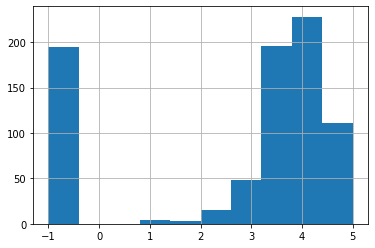

In [25]:
df.Rating.hist()

In [26]:
#df.avg_salary.hist()

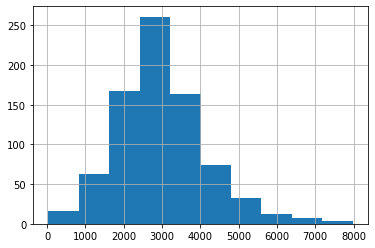

In [27]:
df.desc_len.hist()

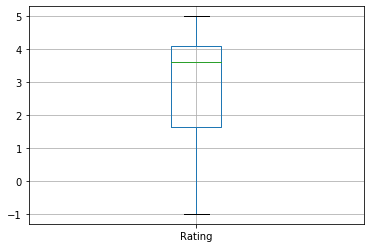

In [28]:
df.boxplot(column='Rating')

In [29]:
#df[['age','avg_salary','Rating','desc_len']].corr()

In [30]:
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
#sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),cmap=cmap,vmax=3,center=0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

In [31]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'company_txt', 'age', 'python', 'R', 'spark', 'aws', 'excel', 'SAP',
       'SQL', 'ML', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [32]:
df.Size= df.Size.replace('Unknown','-1')

In [33]:
df['Type of ownership']=df['Type of ownership'].replace('Unknown','-1')

In [34]:
df.Revenue= df.Revenue.replace('Unknown / Non-Applicable','-1')

In [35]:
df_cat= df[['Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue','python','R','spark','aws','excel','SQL', 'job_simp', 'seniority']]

graph for Size: total = 8


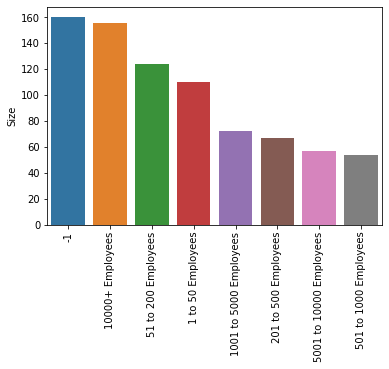

graph for Type of ownership: total = 12


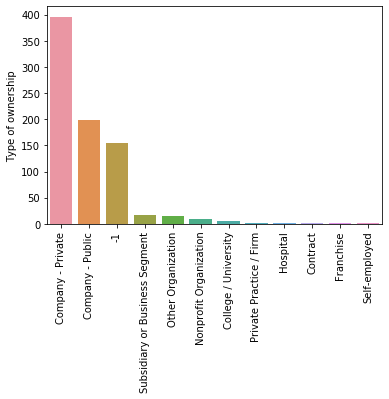

graph for Industry: total = 22


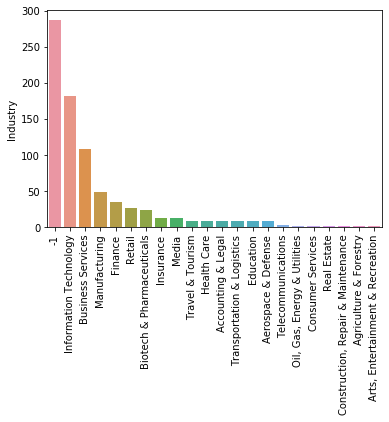

graph for Sector: total = 62


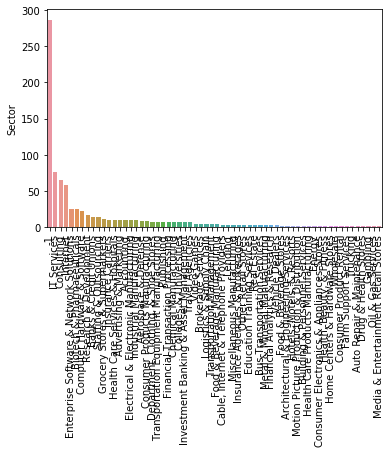

graph for Revenue: total = 13


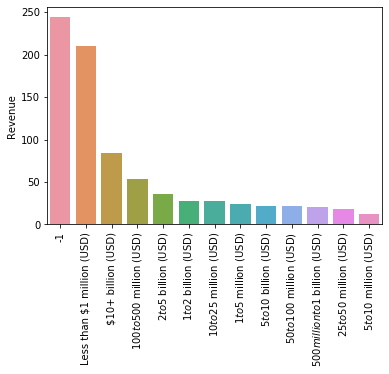

graph for python: total = 2


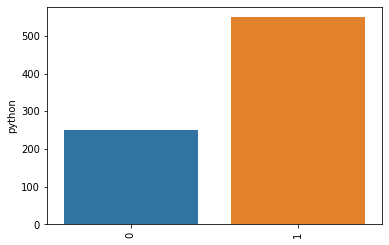

graph for R: total = 2


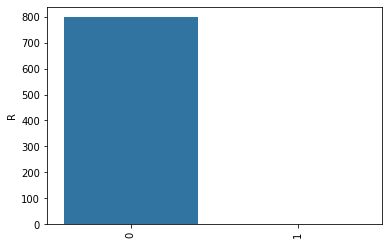

graph for spark: total = 2


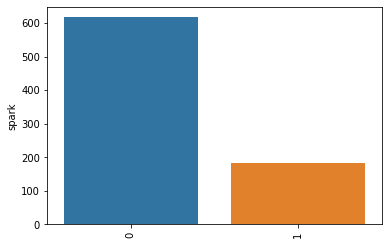

graph for aws: total = 2


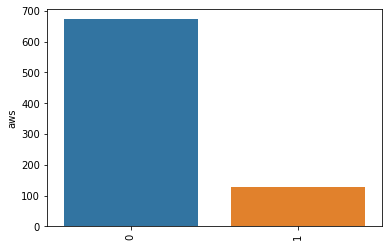

graph for excel: total = 2


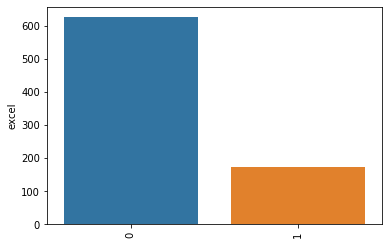

graph for SQL: total = 2


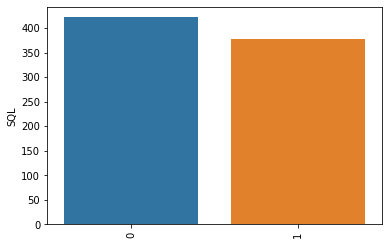

graph for job_simp: total = 6


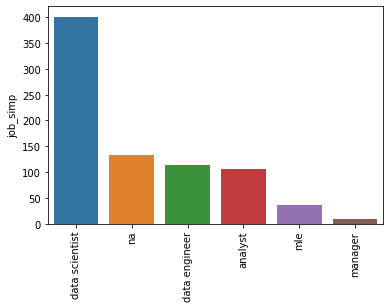

graph for seniority: total = 3


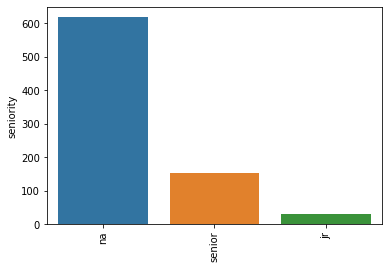

In [36]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total = %d' %(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [37]:
df.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'company_txt', 'age', 'python', 'R', 'spark', 'aws', 'excel', 'SAP',
       'SQL', 'ML', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [38]:
df_dus=df[['Size','Job Description','Rating','company_txt','Location','Type of ownership', 'Industry', 'Sector', 'Revenue','python','R','spark','aws','excel','SQL','SAP', 'ML','job_simp', 'seniority']]
df_dus.set_index("Location", inplace=True)

In [39]:
df_dus= df_dus.loc['Düsseldorf']

In [40]:
df_dus.head()

Size  \
Location                             
Düsseldorf     51 to 200 Employees   
Düsseldorf        10000+ Employees   
Düsseldorf                      -1   
Düsseldorf        10000+ Employees   
Düsseldorf  1001 to 5000 Employees   

                                              Job Description  Rating  \
Location                                                                
Düsseldorf  Data Scientist (m/w/d)\n\nWenn du Muster in Da...     4.9   
Düsseldorf  HENKEL IS FOR THOSE WHO STEP UP. DO YOU?\n\n\n...     4.2   
Düsseldorf  Tools\nPython\nKeras\nSpark\nScala\nKNIME\nTab...    -1.0   
Düsseldorf  Data Scientist\nIstanbul, Turkey\nFull-time\nC...     3.5   
Düsseldorf  trivago is currently working on the restart of...     3.8   

                     company_txt  Type of ownership                Industry  \
Location                                                                      
Düsseldorf          ORAYLIS GmbH  Company - Private  Information Technology   
Düsseldorf  Henkel AG & Co. KGaA   Company - Public           Manufacturing   
Düsseldorf       Flint Analytics  Company - Private                      -1   
Düsseldorf       Publicis Groupe   Company - Public       Business Services   
Düsseldorf          trivago GmbH   Company - Public  Information Technology   

                                     Sector                           Revenue  \
Location                                                                        
Düsseldorf                      IT Services                                -1   
Düsseldorf  Consumer Products Manufacturing                $10+ billion (USD)   
Düsseldorf                               -1        Less than $1 million (USD)   
Düsseldorf          Advertising & Marketing           $5 to $10 billion (USD)   
Düsseldorf                         Internet  $500 million to $1 billion (USD)   

            python  R  spark  aws  excel  SQL  SAP  ML        job_simp  \
Location                                                                 
Düsseldorf       1  0      1    0      0    1    0   1  data scientist   
Düsseldorf       0  0      0    0      0    0    0   0              na   
Düsseldorf       1  0      1    0      0    0    0   1  data scientist   
Düsseldorf       1  0      0    0      0    1    0   0  data scientist   
Düsseldorf       1  0      1    0      1    1    0   0  data scientist   

           seniority  
Location              
Düsseldorf        na  
Düsseldorf        na  
Düsseldorf        na  
Düsseldorf        na  
Düsseldorf    senior

graph for Size: total = 8


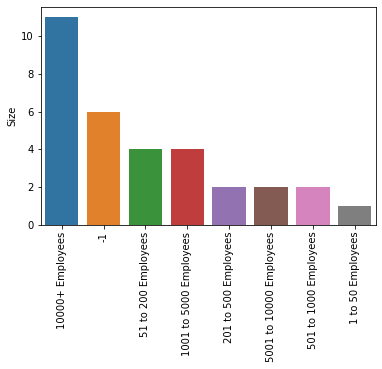

graph for Job Description: total = 31


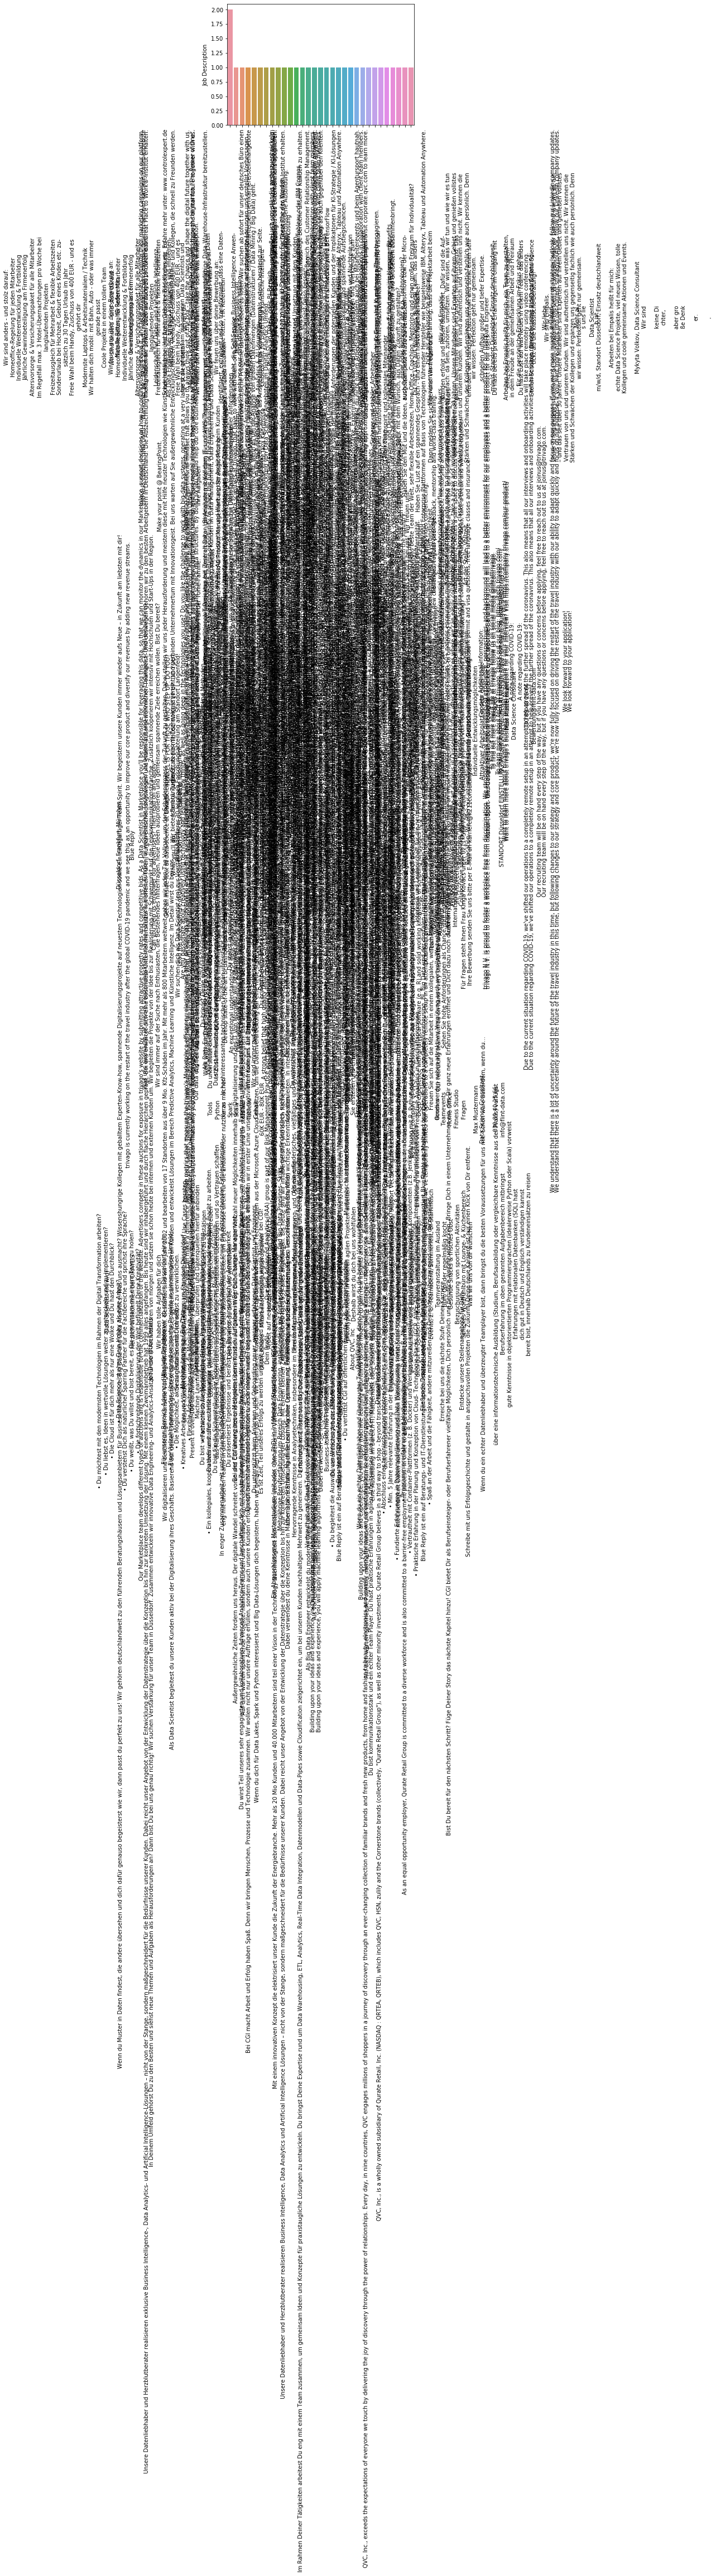

graph for Rating: total = 12


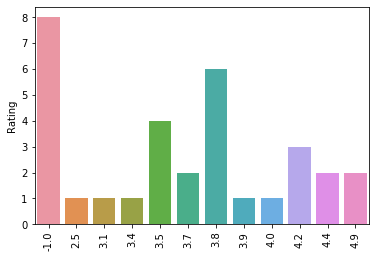

graph for company_txt: total = 19


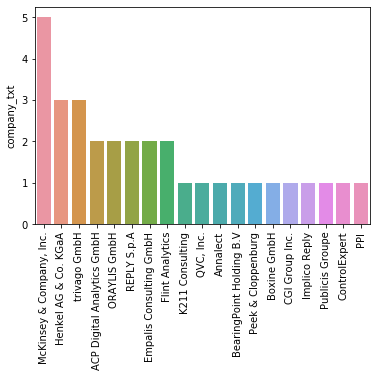

graph for Type of ownership: total = 5


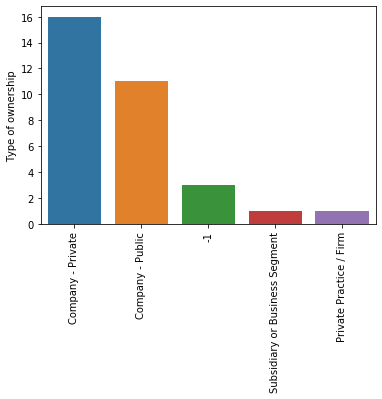

graph for Industry: total = 5


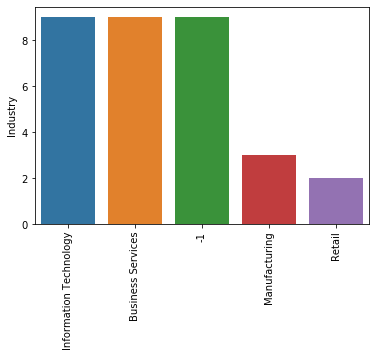

graph for Sector: total = 9


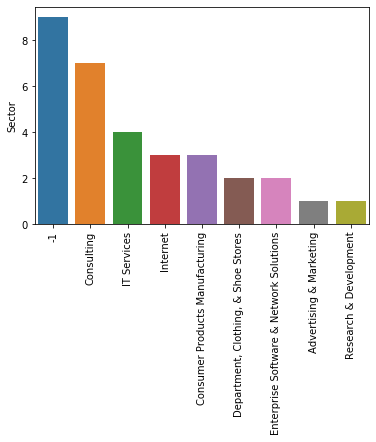

graph for Revenue: total = 9


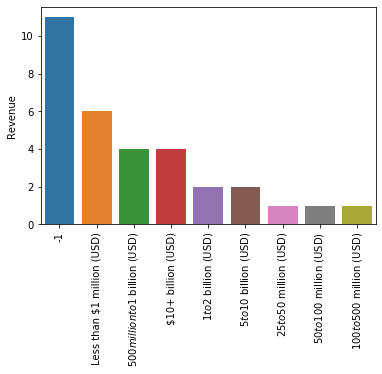

graph for python: total = 2


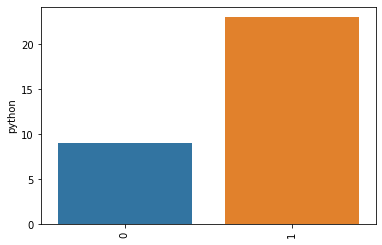

graph for R: total = 1


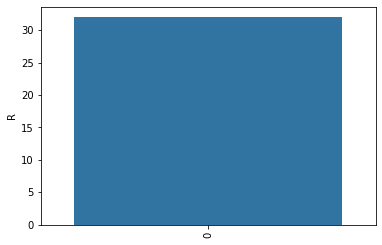

graph for spark: total = 2


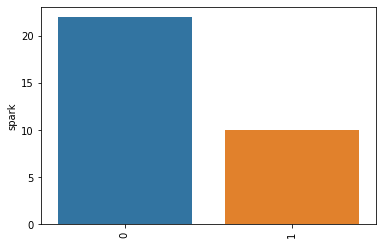

graph for aws: total = 2


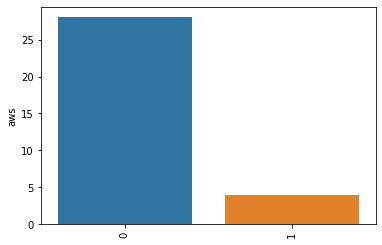

graph for excel: total = 2


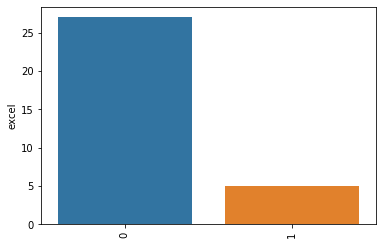

graph for SQL: total = 2


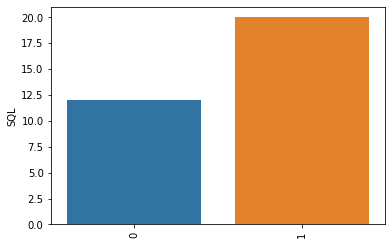

graph for SAP: total = 2


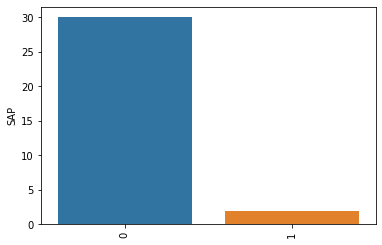

graph for ML: total = 2


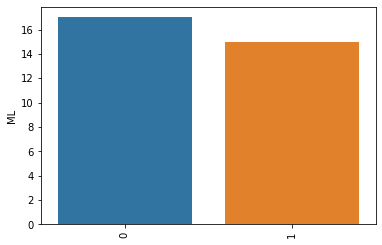

graph for job_simp: total = 4


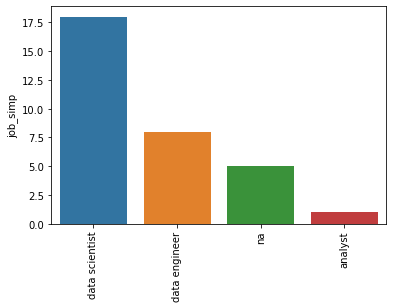

graph for seniority: total = 3


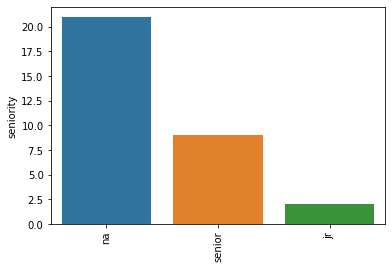

In [41]:
for i in df_dus.columns:
    cat_num = df_dus[i].value_counts()
    print('graph for %s: total = %d' %(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [42]:
df_dus['company_txt'].value_counts()

McKinsey & Company, Inc.      5
Henkel AG & Co. KGaA          3
trivago GmbH                  3
ACP Digital Analytics GmbH    2
ORAYLIS GmbH                  2
REPLY S.p.A                   2
Empalis Consulting GmbH       2
Flint Analytics               2
K211 Consulting               1
QVC, Inc.                     1
Annalect                      1
BearingPoint Holding B.V      1
Peek & Cloppenburg            1
Boxine GmbH                   1
CGI Group Inc.                1
Implico Reply                 1
Publicis Groupe               1
ControlExpert                 1
PPI                           1
Name: company_txt, dtype: int64

In [43]:
df_mydusjob=df_dus[df_dus.seniority != 'senior']

In [44]:
df_mydusjob.drop_duplicates()

Size  \
Location                              
Düsseldorf      51 to 200 Employees   
Düsseldorf         10000+ Employees   
Düsseldorf                       -1   
Düsseldorf         10000+ Employees   
Düsseldorf                       -1   
Düsseldorf  5001 to 10000 Employees   
Düsseldorf     201 to 500 Employees   
Düsseldorf         10000+ Employees   
Düsseldorf         10000+ Employees   
Düsseldorf  5001 to 10000 Employees   
Düsseldorf   1001 to 5000 Employees   
Düsseldorf    501 to 1000 Employees   
Düsseldorf     201 to 500 Employees   
Düsseldorf                       -1   
Düsseldorf        1 to 50 Employees   
Düsseldorf      51 to 200 Employees   
Düsseldorf         10000+ Employees   
Düsseldorf    501 to 1000 Employees   
Düsseldorf   1001 to 5000 Employees   
Düsseldorf         10000+ Employees   
Düsseldorf      51 to 200 Employees   
Düsseldorf      51 to 200 Employees   

                                              Job Description  Rating  \
Location                                                                
Düsseldorf  Data Scientist (m/w/d)\n\nWenn du Muster in Da...     4.9   
Düsseldorf  HENKEL IS FOR THOSE WHO STEP UP. DO YOU?\n\n\n...     4.2   
Düsseldorf  Tools\nPython\nKeras\nSpark\nScala\nKNIME\nTab...    -1.0   
Düsseldorf  Data Scientist\nIstanbul, Turkey\nFull-time\nC...     3.5   
Düsseldorf  Wir sind anders - und stolz darauf:\nHomeoffic...    -1.0   
Düsseldorf  Düsseldorf, Frankfurt, München\n\nBlue Reply\n...     3.7   
Düsseldorf  Dein Job\nAls Teil unseres Data-Science-Teams ...     4.0   
Düsseldorf  HENKEL IS FOR THOSE WHO STEP UP. DO YOU?\n\n\n...     4.2   
Düsseldorf  Our Risk Advanced Analytics (RAA) group is par...     4.4   
Düsseldorf  Düsseldorf\n\nBlue Reply\n\nWas uns ausmacht, ...     3.7   
Düsseldorf  Are you passionate about creatively using tech...     3.8   
Düsseldorf  Wir digitalisieren und beschleunigen manuelle ...     3.1   
Düsseldorf  Als skill- und marktübergreifend agierendes Te...     3.4   
Düsseldorf  Wir sind anders - und stolz darauf:\nHomeoffic...    -1.0   
Düsseldorf  Als Vorreiter in strategisch und innovativ aus...    -1.0   
Düsseldorf  Du als Teil der Tonie-Familie:\nAls Data Engin...    -1.0   
Düsseldorf  Du wirst Teil unseres sehr engagierten und kol...     3.8   
Düsseldorf  Make your point @ BearingPoint.\n\nWir bieten ...     3.5   
Düsseldorf  Are you an engineer with a passion for data an...     3.8   
Düsseldorf  Im Rahmen dieses Praktikums unterstützen Sie u...     3.8   
Düsseldorf  Du bekommst einen Einblick in die vielfältigen...     2.5   
Düsseldorf  Big Data Engineer (Spark) (m/w/d)\n\nWenn du d...     4.9   

                         company_txt        Type of ownership  \
Location                                                        
Düsseldorf              ORAYLIS GmbH        Company - Private   
Düsseldorf      Henkel AG & Co. KGaA         Company - Public   
Düsseldorf           Flint Analytics        Company - Private   
Düsseldorf           Publicis Groupe         Company - Public   
Düsseldorf   Empalis Consulting GmbH        Company - Private   
Düsseldorf               REPLY S.p.A         Company - Public   
Düsseldorf                  Annalect        Company - Private   
Düsseldorf      Henkel AG & Co. KGaA         Company - Public   
Düsseldorf  McKinsey & Company, Inc.        Company - Private   
Düsseldorf               REPLY S.p.A         Company - Public   
Düsseldorf              trivago GmbH         Company - Public   
Düsseldorf             ControlExpert        Company - Private   
Düsseldorf                       PPI                       -1   
Düsseldorf   Empalis Consulting GmbH        Company - Private   
Düsseldorf           K211 Consulting        Company - Private   
Düsseldorf               Boxine GmbH         Company - Public   
Düsseldorf  McKinsey & Company, Inc.        Company - Private   
Düsseldorf  BearingPoint Holding B.V  Private Practice / Firm   
Düsseldorf              trivago GmbH     

In [45]:
df_mydusjob.head()

Size  \
Location                          
Düsseldorf  51 to 200 Employees   
Düsseldorf     10000+ Employees   
Düsseldorf                   -1   
Düsseldorf     10000+ Employees   
Düsseldorf                   -1   

                                              Job Description  Rating  \
Location                                                                
Düsseldorf  Data Scientist (m/w/d)\n\nWenn du Muster in Da...     4.9   
Düsseldorf  HENKEL IS FOR THOSE WHO STEP UP. DO YOU?\n\n\n...     4.2   
Düsseldorf  Tools\nPython\nKeras\nSpark\nScala\nKNIME\nTab...    -1.0   
Düsseldorf  Data Scientist\nIstanbul, Turkey\nFull-time\nC...     3.5   
Düsseldorf  Wir sind anders - und stolz darauf:\nHomeoffic...    -1.0   

                        company_txt  Type of ownership  \
Location                                                 
Düsseldorf             ORAYLIS GmbH  Company - Private   
Düsseldorf     Henkel AG & Co. KGaA   Company - Public   
Düsseldorf          Flint Analytics  Company - Private   
Düsseldorf          Publicis Groupe   Company - Public   
Düsseldorf  Empalis Consulting GmbH  Company - Private   

                          Industry                           Sector  \
Location                                                              
Düsseldorf  Information Technology                      IT Services   
Düsseldorf           Manufacturing  Consumer Products Manufacturing   
Düsseldorf                      -1                               -1   
Düsseldorf       Business Services          Advertising & Marketing   
Düsseldorf                      -1                               -1   

                               Revenue  python  R  spark  aws  excel  SQL  \
Location                                                                    
Düsseldorf                          -1       1  0      1    0      0    1   
Düsseldorf          $10+ billion (USD)       0  0      0    0      0    0   
Düsseldorf  Less than $1 million (USD)       1  0      1    0      0    0   
Düsseldorf     $5 to $10 billion (USD)       1  0      0    0      0    1   
Düsseldorf  Less than $1 million (USD)       0  0      0    0      0    0   

            SAP  ML        job_simp seniority  
Location                                       
Düsseldorf    0   1  data scientist        na  
Düsseldorf    0   0              na        na  
Düsseldorf    0   1  data scientist        na  
Düsseldorf    0   0  data scientist        na  
Düsseldorf    0   0  data scientist        na

graph for Size: total = 8


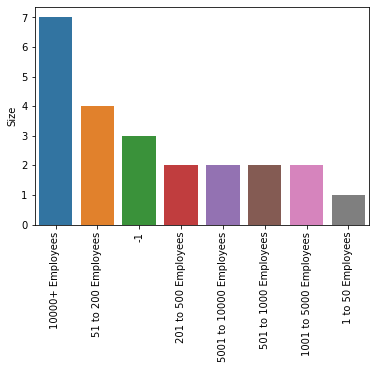

graph for Job Description: total = 22


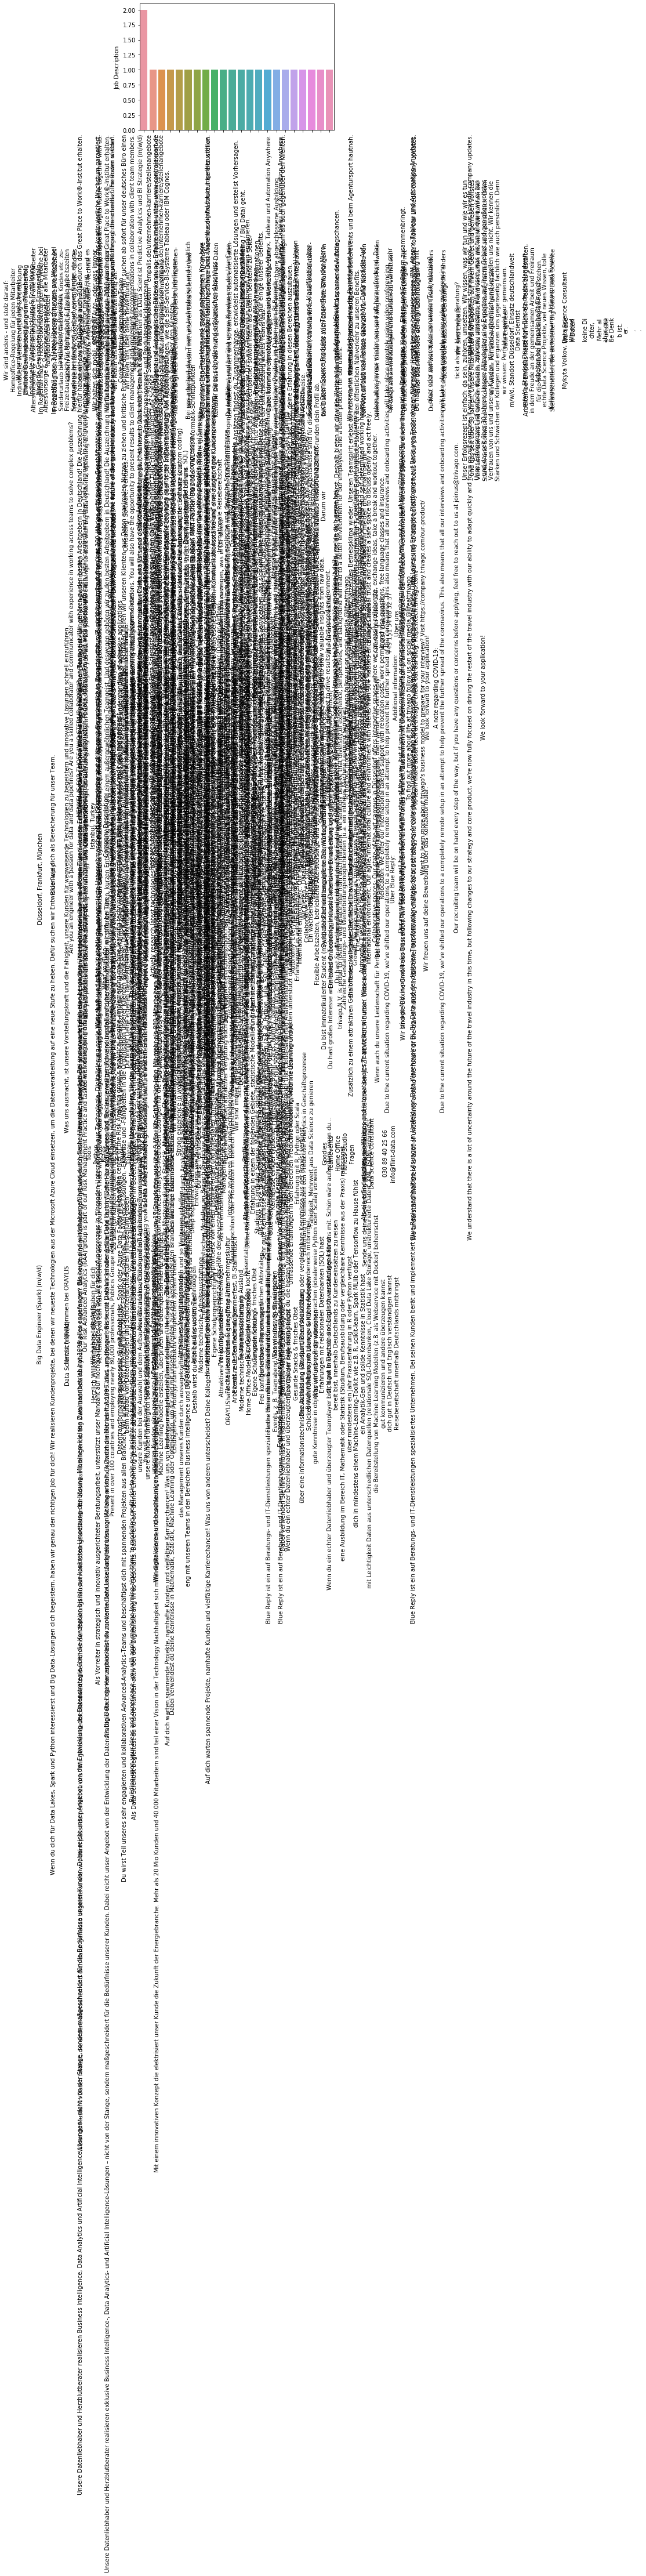

graph for Rating: total = 11


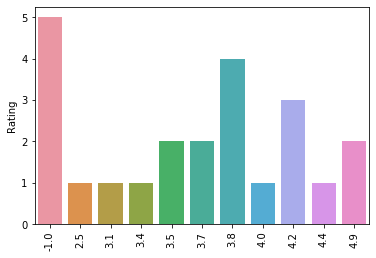

graph for company_txt: total = 15


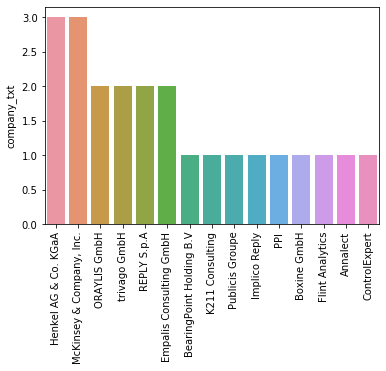

graph for Type of ownership: total = 4


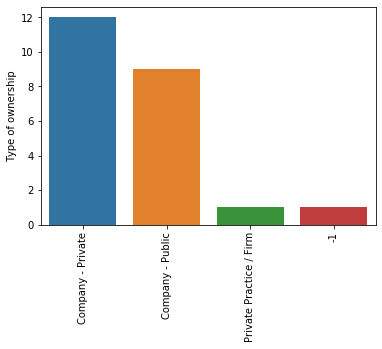

graph for Industry: total = 4


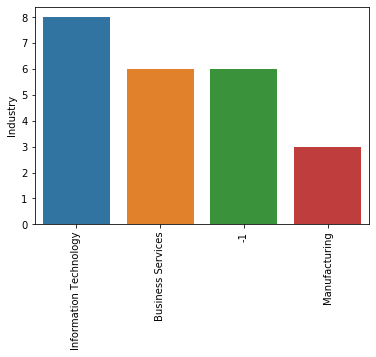

graph for Sector: total = 8


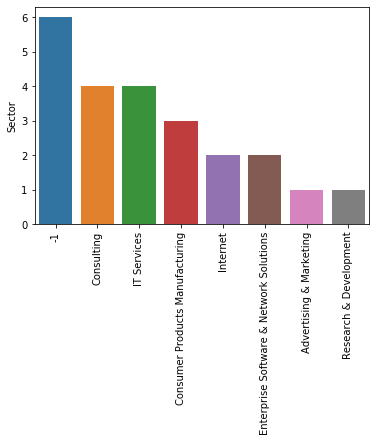

graph for Revenue: total = 8


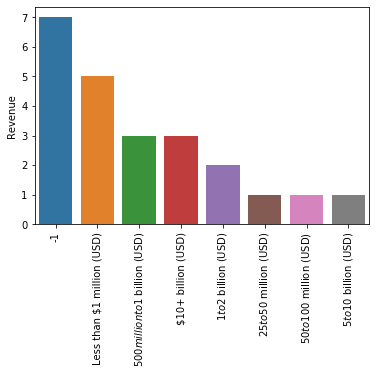

graph for python: total = 2


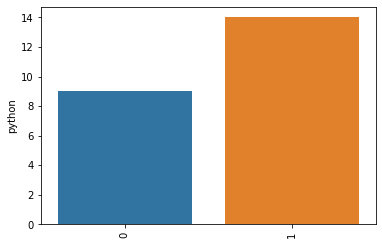

graph for R: total = 1


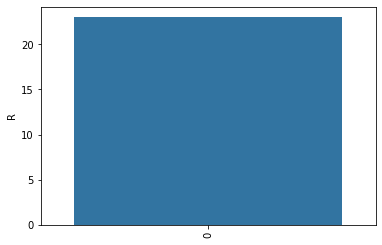

graph for spark: total = 2


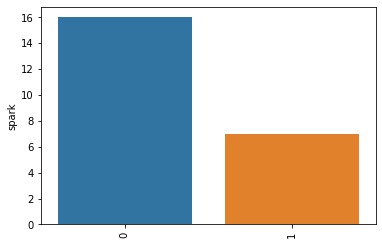

graph for aws: total = 2


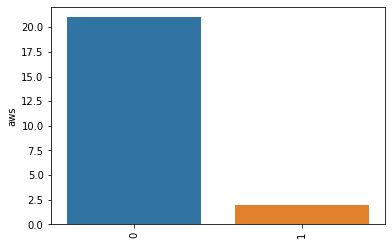

graph for excel: total = 2


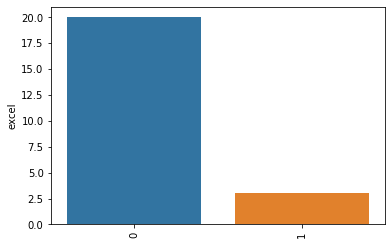

graph for SQL: total = 2


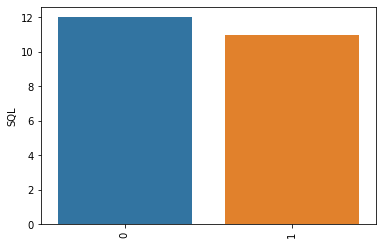

graph for SAP: total = 2


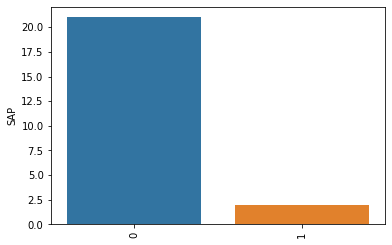

graph for ML: total = 2


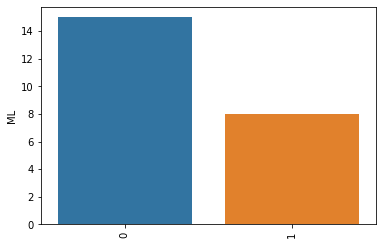

graph for job_simp: total = 4


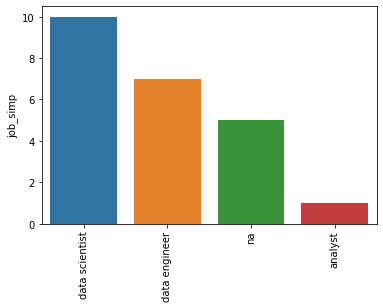

graph for seniority: total = 2


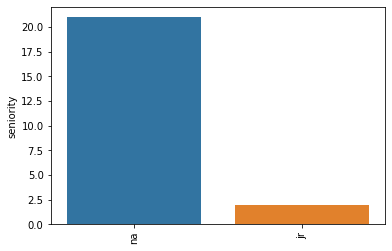

In [46]:
for i in df_mydusjob.columns:
    cat_num = df_mydusjob[i].value_counts()
    print('graph for %s: total = %d' %(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [47]:
#rating,industry,sector,revenue,number of comp,hourly,employer provided, python,r,spark,aws,excel,desc_len,Type of ownership
#pd.pivot_table(df,index=['Rating','Type of ownership', 'Industry', 'Sector', 'Revenue',
#      'hourly', 'employer provided','python_yn', 'R_yn',
#       'spark_yn', 'excel_yn','desc_len',
#       'num_comp'],values='avg_salary')

In [48]:
#df_pivots= df[['Rating','Type of ownership', 'Industry', 'Sector', 'Revenue',
#       'hourly', 'employer provided','python_yn', 'R_yn',
#       'spark_yn', 'excel_yn','desc_len',
#       'num_comp','avg_salary']]

In [49]:
#for i in df_pivots.columns:
#    print(i)
#    print(pd.pivot_table(df_pivots,index=i, values='avg_salary').sort_values('avg_salary',ascending = False))

In [50]:
#pd.pivot_table(df_pivots,index='Revenue',columns='python_yn',values='avg_salary',aggfunc = 'count')

In [51]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [52]:
#import nltk
#nltk.download('stopwords')

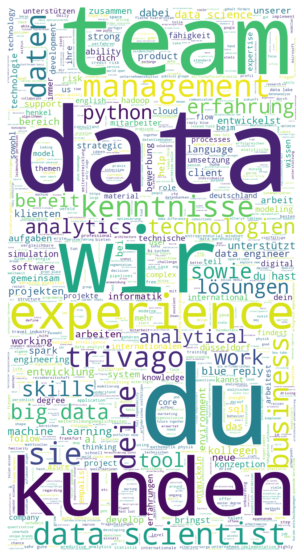

In [53]:
words = " ".join(df_mydusjob['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('german'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()